# Import Library

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

# Import Data

In [6]:
from sklearn.datasets import load_digits

In [7]:
df = load_digits()

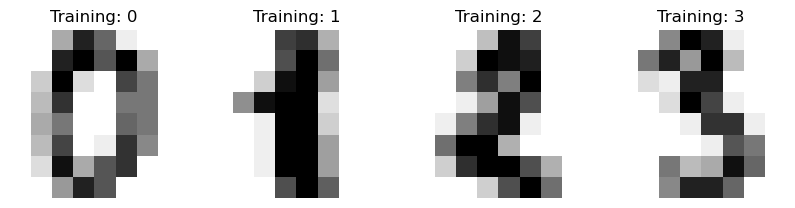

In [8]:
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation = 'nearest')
    ax.set_title('Training: %i' % label)

# Data Preprocessing
##### Flatten Image

In [10]:
df.images.shape

(1797, 8, 8)

In [11]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
df.images[0].shape

(8, 8)

In [13]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [14]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
data[0].shape

(64,)

In [16]:
data.shape

(1797, 64)

# Scaling Data

In [18]:
data.min()

0.0

In [19]:
data.max()

16.0

In [20]:
data = data/16

In [21]:
data.min()

0.0

In [22]:
data.max()

1.0

In [23]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train test split Data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(data, df.target, test_size = 0.3)

In [27]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1257, 64), (540, 64), (1257,), (540,))

# Random Forest model

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier()

In [31]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

# Predict Test Data

In [33]:
y_pred = rf.predict(xtest)

In [34]:
y_pred

array([3, 8, 5, 7, 5, 2, 8, 7, 0, 2, 8, 6, 8, 0, 4, 1, 0, 8, 3, 3, 3, 5,
       2, 2, 9, 8, 0, 1, 0, 0, 6, 2, 9, 6, 4, 9, 8, 6, 8, 7, 9, 5, 7, 1,
       9, 6, 6, 4, 9, 0, 7, 3, 4, 9, 4, 5, 2, 2, 0, 4, 7, 6, 3, 7, 7, 0,
       4, 1, 8, 1, 6, 4, 0, 9, 0, 3, 0, 0, 4, 1, 1, 1, 4, 2, 2, 5, 8, 8,
       9, 6, 6, 8, 4, 7, 1, 5, 4, 7, 1, 4, 2, 2, 8, 2, 4, 4, 8, 1, 9, 5,
       3, 4, 7, 7, 3, 6, 0, 1, 4, 4, 8, 9, 5, 6, 8, 5, 5, 7, 1, 0, 2, 0,
       0, 5, 2, 6, 6, 3, 1, 5, 6, 6, 0, 1, 6, 9, 0, 3, 6, 6, 3, 7, 9, 6,
       5, 2, 9, 2, 2, 7, 6, 3, 4, 9, 3, 6, 1, 0, 5, 6, 4, 2, 0, 9, 9, 4,
       4, 8, 9, 9, 2, 9, 4, 0, 6, 0, 1, 8, 5, 0, 4, 8, 7, 7, 9, 0, 2, 5,
       4, 5, 9, 1, 3, 4, 2, 4, 4, 6, 0, 7, 1, 9, 2, 0, 1, 6, 0, 2, 6, 8,
       5, 2, 7, 7, 7, 6, 2, 2, 5, 7, 9, 6, 4, 4, 6, 7, 5, 6, 8, 2, 1, 9,
       3, 6, 5, 4, 1, 6, 3, 3, 7, 8, 4, 9, 0, 0, 0, 5, 5, 2, 1, 8, 1, 9,
       7, 7, 1, 7, 4, 8, 1, 8, 6, 8, 3, 5, 5, 9, 6, 8, 5, 8, 5, 2, 2, 3,
       8, 3, 0, 7, 1, 7, 4, 5, 6, 8, 2, 3, 4, 2, 1,

# Model Accuracy

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
confusion_matrix(ytest, y_pred)

array([[63,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 56,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 47,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 58,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 64,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  1],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 40,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  1, 44]], dtype=int64)

In [38]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       0.96      1.00      0.98        48
           2       0.98      0.98      0.98        57
           3       1.00      0.98      0.99        48
           4       1.00      0.94      0.97        62
           5       0.96      0.96      0.96        56
           6       0.98      1.00      0.99        64
           7       0.91      0.98      0.94        52
           8       0.95      0.93      0.94        43
           9       0.96      0.94      0.95        47

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

